![Netflix](https://res.cloudinary.com/practicaldev/image/fetch/s--THrf5Yjw--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/n6brz4p7iq7j1mulo1nv.jpg)

# <center> EXPLORATORY ANALYSIS OF NETFLIX MOVIES AND TV SHOWS </center>
## <center> BY CHAN MING LI </center>

## INTRODUCTION
Netflix is a popular streaming services that offers a ton of TV shows and movies for subscribed members all around the world. I will perform an exploratory analysis on Netflix movies and TV shows in this project. The objective of this project is to explore and find out the trends in the dataset through visualizations. 

The source of the dataset used in this analysis project was taken from Kaggle and <a href= 'https://www.kaggle.com/shivamb/netflix-shows'> click here</a> to view the dataset. The dataset contains the information of TV shows and movies available as of 2019. The libraries or packages used in the project are taught in "Data Analysis in Python: Zero to Pandas" course by Jovian.  

Libraries / Packages used in the project:
- Numpy <a href='https://numpy.org/'> Learn More </a>
- Pandas <a href='https://pandas.pydata.org/docs/'> Learn More </a>
- Matplotlib <a href='https://matplotlib.org/'> Learn More </a>
- Seaborn <a href='https://seaborn.pydata.org/'> Learn More </a>
- Jovian <a href='https://jovian.ai/docs/'> Learn More </a>
- opendatasets <a href='https://pypi.org/project/opendatasets/'> Learn More </a>


In [1]:
project_name = "analysis_on_netflix_tvshows_and_movies"

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian 

In [ ]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

## TABLE OF CONTENTS
### 1. Import Packages / Libraries Needed and Loading the Dataset

### 2. Data Preperation and Cleaning

### 3. Exploratory Analysis & Visualization

### 4. Asking and Answering Questions

### 5. Inferences and Conclusion

### 6. References and Future Work

# <center> Let's Get Started ! </center>
## <center> 1. Import Packages and Loading the Dataset </center>

### Import Packages / Libraries
In the first section, we're going to install and import some useful packages and libraries that will used in this project.

In [3]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [4]:
!pip install jovian opendatasets --upgrade --quiet

### Loading the dataset

In this section, we will download the <a href= 'https://www.kaggle.com/shivamb/netflix-shows'> dataset</a> from the Kaggle by using a function `download` from a Python library known as opendatasets. 

In [5]:
# Change this
kaggle_dataset = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [6]:
import opendatasets as od
od.download(kaggle_dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chanmingli
Your Kaggle Key: ········


100%|██████████| 1.34M/1.34M [00:00<00:00, 81.1MB/s]

The dataset has been downloaded from Kaggle. Let's check and confirm that the dataset download by using `listdir` to list all the all files in the directory.

In [7]:
# Change this
data_dir = './netflix-shows'

In [8]:
os.listdir(data_dir)

['netflix_titles.csv']

Now, we are ready to load the dataset into a data frame. Since the dataset is stored in a `csv` file therefore we will use a common pandas function `pd.read_csv` to load and read the dataset.

In [9]:
netflix_raw_df = pd.read_csv('./netflix-shows/netflix_titles.csv')

In [10]:
type(netflix_raw_df)

pandas.core.frame.DataFrame

We have verified that the datatset is loaded into a DataFrame. Let's take a glimpse of the dataset to see how it looks like. 

In [11]:
netflix_raw_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Points we noticed from the dataset:
- There are some NaN/Null values in different columns.
- Some columns seems like not useful. 
- A dataset without user rating. 

In [12]:
jovian.commit(project = project_name, files = ['./netflix-shows/netflix_titles.csv'])

NameError: name 'project_name' is not defined

## <center> 2. Data Preparation and Cleaning</center>

In [13]:
netflix_raw_df.shape

(8807, 12)

In [14]:
netflix_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


As we can see, there are a total of 12 columns and 7787 records in our dataframe. Besides, int64 and object are the two data type identified in the dataframe. and there are columns that have null values such as 'director', 'cast', 'country', 'date_added', 'rating'.

In [15]:
netflix_raw_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [16]:
netflix_raw_df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [17]:
netflix_raw_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

From the `nunique()` function above, we know that all record in 'show_id' is having a unique value and we can check the unique value in certain column by using `unique()` function. For instance, 'type' has only 2 unique values which is 'TV Shows' and 'Movie'. 

### Handling Missing, Incorrect and Invalid data
The main objective of handling missing, incorrect and invalid data is to ensure the quality of the datasets for analytics and enables accurate decision-making. 

Firstly, let's check and identify the columns that have null values within the dataframe in descending order. 

In [18]:
netflix_raw_df.isnull().sum().sort_values(ascending = False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [19]:
# Allign all diagrams in center 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

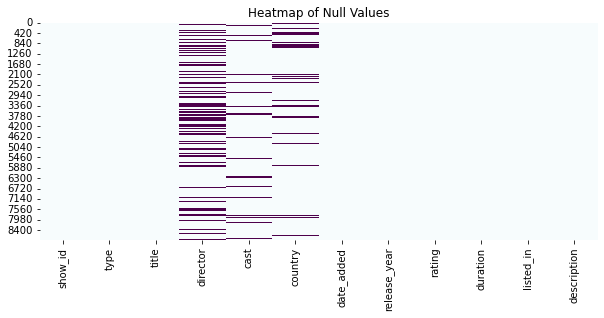

In [20]:
# Plotting a heatmap of null values
plt.figure(figsize = (10, 4))
sns.heatmap(netflix_raw_df.isnull(), cmap="BuPu", cbar =False)
plt.title("Heatmap of Null Values");

As we can see in the heatmap above, there are some null values in 'director', 'cast', 'country', 'date_added', 'rating' columns in the dataset. We should handle all null values before moving on to EDA. 

In [21]:
# Percentage of null values 
percentage_nan = netflix_raw_df.isnull().sum() / len(netflix_raw_df) * 100
percentage_nan.sort_values(ascending = False)

director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

We are assigning "Unavailable" to the null values in the 'director', 'cast' and country' columns since they contain the majority of the null values. Besides, we are removing or dropping the data that contains null value in 'date_added' and 'rating' column because they only contain a small portion of null values. Therefore, this will be an ideal solution to handle null values in dataset to avoid loss of information. 

In [22]:
netflix_raw_df['director'].fillna('Unknown', inplace = True)
netflix_raw_df['cast'].fillna('Cast Unavailable', inplace = True)
netflix_raw_df['country'].fillna('Country Unavailable', inplace = True)
netflix_raw_df.dropna(subset = ['date_added', 'rating'], inplace = True)

Let's check if there is still any null value in the dataset. 

In [23]:
netflix_raw_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

There are no null values in the dataset anymore.

### Splitting the dataset
Furthermore, we will split the dataset into two dataframe by its type which is 'TV Show' and 'Movie' so that we can perform deeper analysis in either TV shows or movies only. 

In [24]:
netflix_tvshows_df = netflix_raw_df[netflix_raw_df['type'] == 'TV Show'].copy()
netflix_tvshows_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Cast Unavailable,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [25]:
netflix_movies_df = netflix_raw_df[netflix_raw_df['type'] == 'Movie'].copy()
netflix_movies_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Cast Unavailable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


The dataset is separated into two dataframe successfully. After that, we capitalize all column's name to make visualization of dataframe easier and change the 'duration' column in the dataframe of TV shows to 'Seasons'. This is because movies are usually based on the duration of movies while tv shows are usually based on the number of seasons. 

In [26]:
netflix_tvshows_df.columns = netflix_tvshows_df.columns.str.capitalize()
netflix_movies_df.columns = netflix_movies_df.columns.str.capitalize()

In [27]:
netflix_tvshows_df.rename(columns = {'Duration' : 'Seasons'}, inplace = True)

## <center> 3. Exploratory Analysis and Visualization </center>
Exploratory analysis will help us to find insights from the dataset and also explore and investigate the relationship between variables. 

In [28]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Some format changes has been made for the visualization part later. 

### Netflix Type - Movie / TV Shows

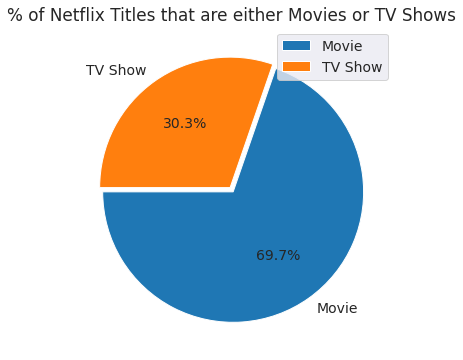

In [29]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_raw_df.type.value_counts(), explode=(0.02,0.02), labels=netflix_raw_df.type.value_counts().index, autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

### Count of TV Shows Seasons

In [30]:
tvshows_seasons_df = netflix_tvshows_df.groupby(['Seasons'])['Show_id'].count().sort_values(ascending = False)
tvshows_seasons_df.head(20)

Seasons
1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
12 Seasons       2
13 Seasons       2
15 Seasons       2
11 Seasons       1
17 Seasons       1
Name: Show_id, dtype: int64

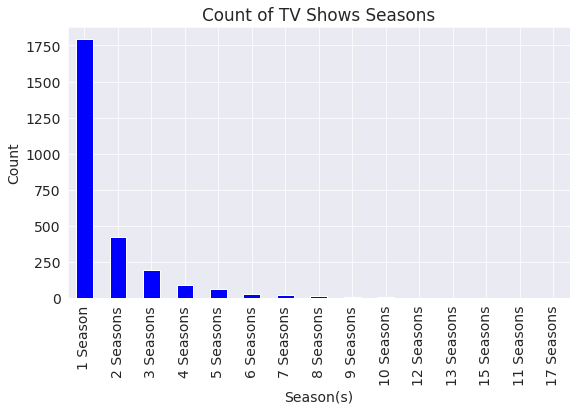

In [31]:
tvshows_seasons_df.plot(kind = 'bar', color = 'b')
plt.xlabel('Season(s)')
plt.ylabel('Count')
plt.title("Count of TV Shows Seasons")
plt.show()

### Count of Movies Duration

In [32]:
movies_duration_df = netflix_movies_df.groupby(['Duration'])['Show_id'].count().sort_values(ascending = False)
movies_duration_df.head(20)

Duration
90 min     152
93 min     146
94 min     146
97 min     146
91 min     144
95 min     137
96 min     130
92 min     129
102 min    122
98 min     120
99 min     118
101 min    116
88 min     116
103 min    114
106 min    111
100 min    108
89 min     106
104 min    104
86 min     103
105 min    101
Name: Show_id, dtype: int64

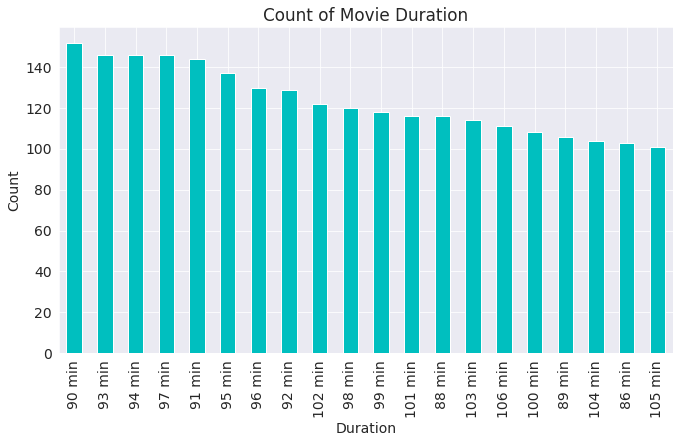

In [33]:
plt.figure(figsize=(11, 6))
movies_duration_df.head(20).plot(kind = 'bar', color = 'c')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title("Count of Movie Duration")
plt.show()

### Number of Releases per Country

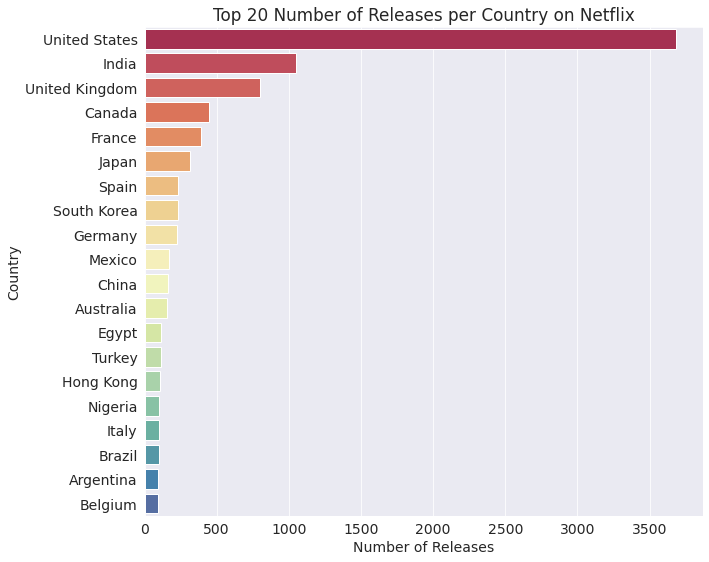

In [34]:
filtered_countries = netflix_raw_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(10,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20], palette = "Spectral" )
plt.title('Top 20 Number of Releases per Country on Netflix')
plt.xlabel('Number of Releases')
plt.ylabel('Country')
plt.show()

### Count Ratings

In [57]:
def rename(row):
    if row == 'TV-MA':
        row = 'TV-MA - Mature Audience Only'
    elif row == 'G':
        row = 'G – General Audiences'
    elif row == 'TV-PG':
        row = 'TV-PG – Parental Guidance Suggested'
    elif row == 'PG':
        row = 'PG – Parental Guidance Suggested'
    elif row == 'PG-13':
        row = 'PG-13 – Parents Strongly Cautioned'
    elif row == 'R':
        row = 'R – Restricted'
    elif row == 'NC-17':
        row = 'NC-17 – No children under 17'
    elif row == 'TV-Y':
        row = 'TV-Y - All Children'
    elif row == 'TV-Y7':
        row = 'TV-Y7-FV - Directed to Older Children above 7'
    elif row == 'TV-Y7-FV':
        row = 'TV-Y7 FV: Directed to Older Children - Fantasy Violence'
    elif row == 'TV-14':
        row = 'TV-14 - Parents Strongly Cautioned'
    elif row == 'TV-G':
        row = 'TV-G: General Audience'
    elif row == 'UR' or 'NR':
        row = 'UR - Unrated'
    else:
        row = row
    return row

netflix_tvshows_df['Rating'] = netflix_tvshows_df['Rating'].apply(rename)
netflix_movies_df['Rating'] = netflix_movies_df['Rating'].apply(rename)

### Count of Ratings (Movies)

In [56]:
movies_ratings_df = netflix_movies_df.Rating.value_counts().sort_values(ascending=False)
movies_ratings_df

TV-MA - Mature Audience Only                               2062
TV-14 - Parents Strongly Cautioned                         1427
R – Restricted                                              797
TV-PG – Parental Guidance Suggested                         540
PG-13 – Parents Strongly Cautioned                          490
PG – Parental Guidance Suggested                            287
TV-Y7-FV - Directed to Older Children above 7               139
TV-Y - All Children                                         131
TV-G: General Audience                                      126
UR - Unrated                                                 81
G – General Audiences                                        41
TV-Y7 FV: Directed to Older Children - Fantasy Violence       5
NC-17 – No children under 17                                  3
Name: Rating, dtype: int64

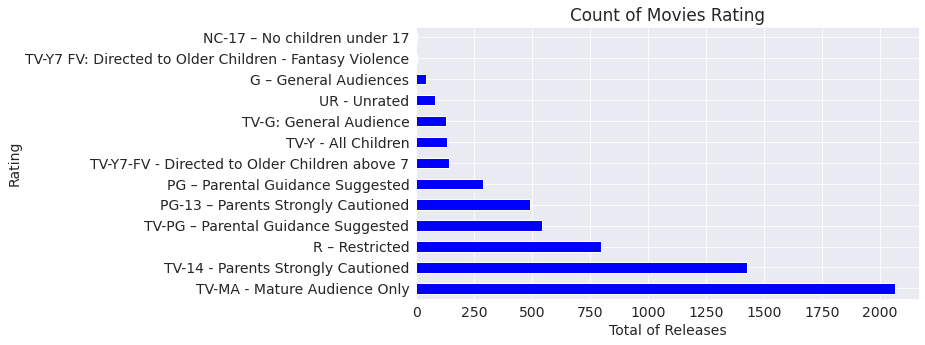

In [77]:
movies_ratings_df.plot(kind='barh', color = 'b')
plt.xlabel('Total of Releases')
plt.ylabel('Rating')
plt.title('Count of Movies Rating')
plt.show()

### Count of Ratings (TV Shows)

In [78]:
tvshows_ratings_df = netflix_tvshows_df.Rating.value_counts().sort_values(ascending=False)
tvshows_ratings_df

UR - Unrated    2664
Name: Rating, dtype: int64

## <center> 4. Asking and Answering Questions </center>

### Q1: 

#### Q2: TODO - ask a question here and answer it below

#### Q3: TODO - ask a question here and answer it below

#### Q4: TODO - ask a question here and answer it below

#### Q5: TODO - ask a question here and answer it below

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.
References Notes:
https://res.cloudinary.com/practicaldev/image/fetch/s--THrf5Yjw--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/n6brz4p7iq7j1mulo1nv.jpg (Netflix Photo)

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()